# Vérification du transposé du gradient de vitesse dans le tenseur des contraintes visqueuses

In [1]:
from trustutils import run 

run.introduction('D. Jamet')

## Introduction 
 Validation made by : D. Jamet



 Report generated 25/01/2022

### Description

On  impose un champ de vitesse à divergence  nulle  particulier  dans  tout  le  domaine. On  choisit une viscosité variable en espace.  Pour ces deux champs, il est possible de déterminer la solution analytique de la force visqueuse. Dans le cas particulier considéré, cette force est un gradient et doit être pris encompte par la pression. On compare donc la pression analytique à la pression calculée par GENEPI.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/EF/EF_Grad_U_Transpose_2D/build)

In [3]:
from trustutils import run 
import os
c1 = run.addCase(".","grad_u_transpose_2d.data") 
run.printCases()
run.runCases()

### Test cases 
* ./grad_u_transpose_2d.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 0.2s.


## Champ de pression
Dans cette partie, on compare le champ de pression calculé par GENEPI et le champ de pression analytique.
### Champs de pression calculé et analytique
Le champ de pression calculé par GENEPI est tracé et le champ de pression analytique est donné par des isovaleurs.

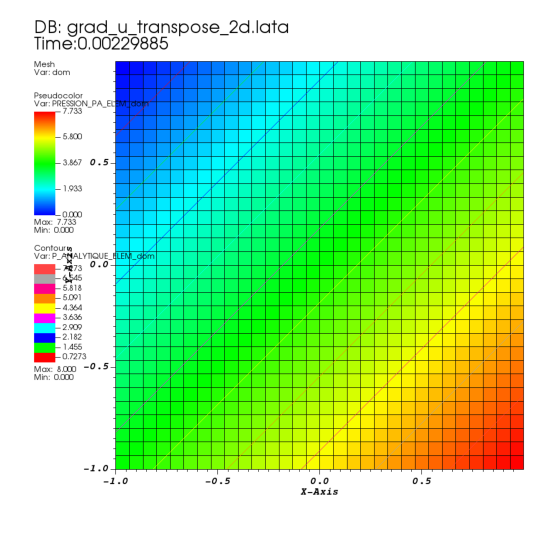

In [4]:
from trustutils import visit

Graphique=visit.Show("./grad_u_transpose_2d.lata","Pseudocolor","PRESSION_PA_ELEM_dom")
Graphique.visitCommand("DefineScalarExpression(\"P_ANALYTIQUE_ELEM_dom\",\"(4+2*coord(dom)[0]-2*coord(dom)[1])\")")
Graphique.addField("./grad_u_transpose_2d.lata","Contour","P_ANALYTIQUE_ELEM_dom")
Graphique.plot() 

### Erreur sur le champ de pression

On trace l'erreur entre le champ de pression calculé par GENEPI et le champ de pression analytique. Sont tracés le champ de l'erreur et les iso-valeurs de l'erreur.

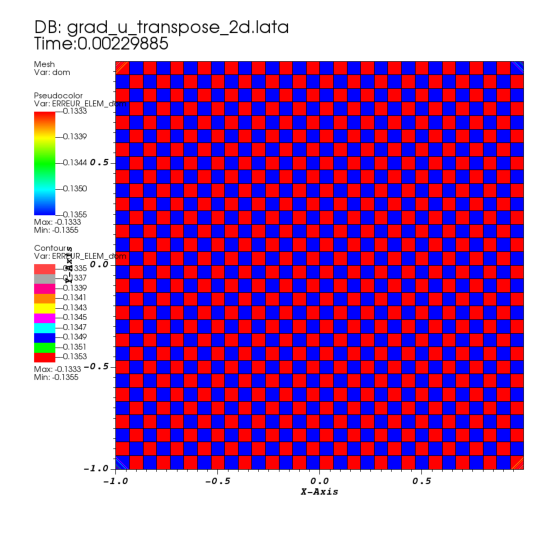

In [5]:
from trustutils import visit

Graphique=visit.Show("./grad_u_transpose_2d.lata","Mesh","dom",plotmesh=False)
Graphique.visitCommand("DefineScalarExpression(\"ERREUR_ELEM_dom\",\"PRESSION_PA_ELEM_dom-(4+2*coord(dom)[0]-2*coord(dom)[1])\")")
Graphique.addField("./grad_u_transpose_2d.lata","Pseudocolor","ERREUR_ELEM_dom")
Graphique.addField("./grad_u_transpose_2d.lata","Contour","ERREUR_ELEM_dom")
Graphique.plot() 

## Data Files
### grad_u_transpose_2d

In [6]:
from trustutils import run

run.dumpDataset("./grad_u_transpose_2d.data")

 # Hydraulique 2D pour tester le grad(u)^T du tenseur visqueux #
 
 dimension 2
 ecriturelecturespecial 0
 Pb_hydraulique pb
 
 Domaine dom
 
 Mailler dom
 {
         Pave Cavite
         {
                 Origine -1. -1.
                 Nombre_de_noeuds 31 31
                 Longueurs 2. 2.
         }
         {
                 Bord Gauche   X = -1.  -1. <= Y <= 1.
                 Bord Droit    X =  1.  -1. <= Y <= 1.
                 Bord Bas      Y = -1.  -1. <= X <= 1.
                 Bord Haut     Y =  1.  -1. <= X <= 1.
         }
 }
 
 EF dis
 
 Scheme_euler_explicit sch
 Read sch
 {
 	 tinit 0
 	 tmax 2.5
 	 dt_min 5.e-4
 	 dt_start dt_calc
 	 dt_max 5.e-3
 	 dt_impr 5.e-1
 	 dt_sauv 1
 	 seuil_statio 1.e-8
 	 seuil_statio 8.7e-06
 }
 
 Fluide_Incompressible eau
 Read eau
 {
 	 mu Champ_Fonc_XYZ dom 1 x+y
 	 rho Champ_Uniforme 1 2
 }
 
 Associate pb dom
 Associate pb sch
 Associate pb eau
 
 Discretize pb dis
 
 Read pb
 {
 	 Navier_Stokes_standard
 	 {
                 m